In [1]:
import pandas as pd
import numpy as np
from nltk.stem.snowball import SnowballStemmer
import xlwt
import heapq
from heapq import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pickle

from EM import *
from cleaningData import *

# Imports from __future__ in case we're running Python 2
from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals

# Our numerical workhorses
import scipy.integrate

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
def serialize(object,fichier):
    pickle.dump(object, file(fichier,'w'))

def deserialize(fichier):
    return pickle.load(file(fichier))

In [3]:
param = deserialize("/Users/estherboccara/Desktop/EMAlgo/parametersWith31Clusters56.pickle")

In [4]:
K = param['K']
P = param['P']
Pi = param['Pi']
Rpost = param['R']

# Process data

In [5]:
df = pd.read_csv("NIPS_1987-2015.csv", sep=',', index_col = 0)
df.shape

(11463, 5811)

In [6]:
dfTranspose = df.transpose()

In [7]:
B = 300
R = 10
data = extractSubDictionaryBasedOnProportions(dfTranspose, B)
#data = extractSubDictionary(dfTranspose, B, R)
n = float(data.sum().sum())

In [8]:
#data.sum(1)
#nb de mots par article
#df.sum().min()

In [8]:
n

3087071.0

In [9]:
data = dropVoidArticles(data)
#data

2452
2880
3277
4062
4099
4204
4228
5595


In [11]:
data.sum(1).nsmallest(20)

2002_81       3
2001_8       13
1988_93      27
1988_92      28
2001_6       59
1988_51      71
2002_151     78
1990_4       79
1989_78      81
1989_95     111
1989_89     123
1990_54     132
1987_48     135
1990_75     145
1997_20     147
2001_2      149
1989_96     151
1997_22     151
1993_79     152
1993_111    152
dtype: int64

# Run EM (on selected model)

In [12]:
#thresholdConvergence = 1
#epsilonForInitialization = .01
#deltaInit = 0
#L = len(data)
#B = data.shape[1]
#K = 5
#dataClean = dataClean.values
#dataClean = data.values

In [13]:
#PfromEM,PifromEM,RfromEM,logScoreFromEM,logScoresFromEM = expectationMaximisation2(dataClean, K, L, B, thresholdConvergence,  epsilonForInitialization, 200)


In [14]:
#K, P, Pi,R,logScore,logScores = readjustEM(dataClean, L, B, PfromEM, PifromEM,RfromEM,  logScoreFromEM,logScoresFromEM, thresholdConvergence, epsilonForInitialization, maxIterations = 200)

In [10]:
articles = data.index.values.tolist()  # an ndarray method, you probably shouldn't depend on this
dictionary = list(data.columns.values)
PAsDf = pd.DataFrame(P, columns = dictionary)

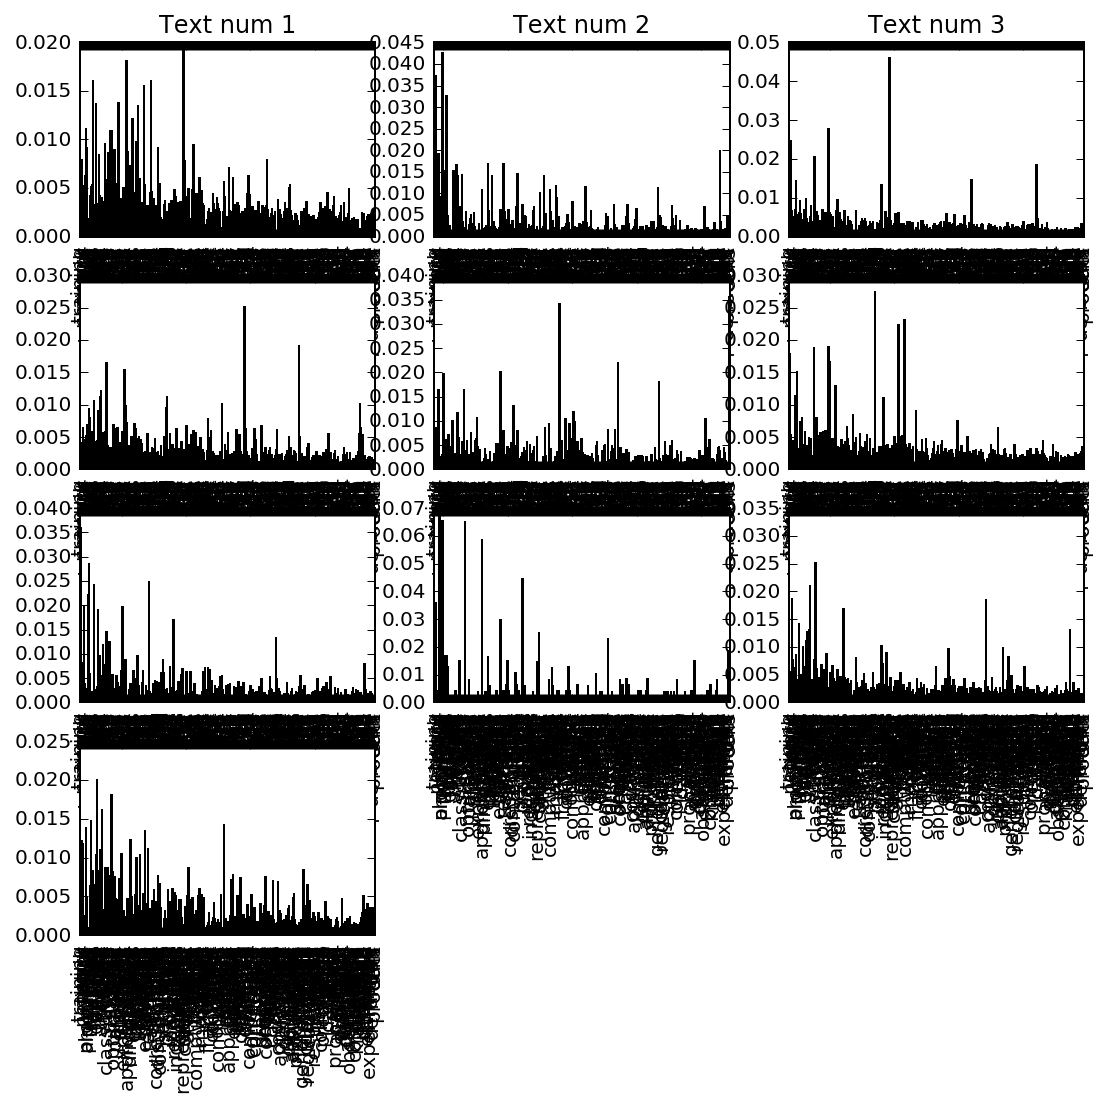

In [14]:
fig = plt.figure(1, figsize=(9,8))

for k in range(1, 11):
    fig.add_subplot(4,3,k)
    PAsDf.ix[k-1,].plot.bar()
    plt.axhline(0, color='k')
    plt.title("Text num " + str(k))

In [15]:
#R

In [11]:
groups = np.argmax(Rpost, axis=1)
groups = [list(groups)]
textGroups = pd.DataFrame(groups, columns = articles)

In [12]:
numberOfArticlesByYear = []
for i in range(1987,2016):
    #print(i)
    j = 0
    for l in list(textGroups):
        if str(i) == l[0:4]:
            j+=1
    numberOfArticlesByYear.append(j)
    
groupAveragesOverYears = []
j = 0
for y in range(29):
    #print (y)
    #print (j, j + numberOfArticlesByYear[y])
    groupAveragesOverYears.append(np.mean(Rpost[j:(j + numberOfArticlesByYear[y])], axis = 0))
    j = j + numberOfArticlesByYear[y]
    #print (j)
    
mostUsedWordsAccrossClusters = []
for i in range(len(P)):
    indexes = heapq.nlargest(30, range(len(P[i])), P[i].take)
    mostUsedWordsAccrossClusters.append([dictionary[u] for u in indexes])

In [18]:
#groupAveragesOverYears

In [19]:
selectedGroups = [19]
for g in selectedGroups:
    print(groups[0].count(g))

224


In [20]:
#selectedGroups = [0, 2, 18, 19, 21, 24]


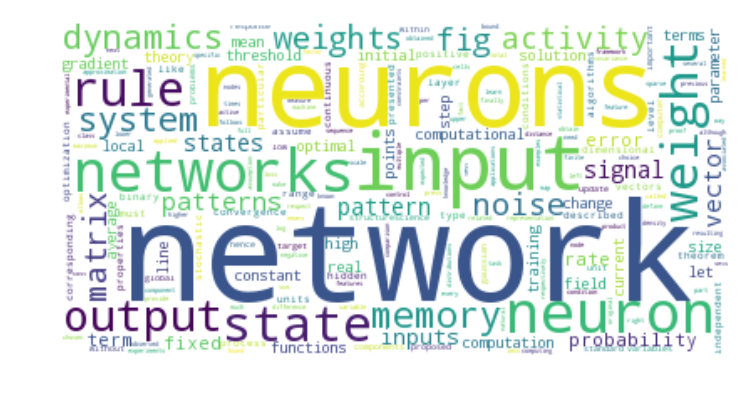

In [53]:
selectedGroups = [19]   #defines which cluster to be represented
for g in selectedGroups:
    dicGroup = dict(zip(dictionary, list(P[g])))
    wordcloud = WordCloud( background_color='white')
    wordcloud.generate_from_frequencies(frequencies=dicGroup)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    #wordcloud.to_file("WordCloudGroup "+ str(g) + ".png")
import heapq
listNlargest = heapq.nlargest(12,dicGroup, key=dicGroup.get)

In [48]:
listNlargest

['network',
 'neurons',
 'input',
 'neuron',
 'state',
 'weight',
 'rule',
 'output',
 'memory',
 'dynamics',
 'system',
 'matrix']

In [40]:
clusters = [0,2,8,18,19,24,30]

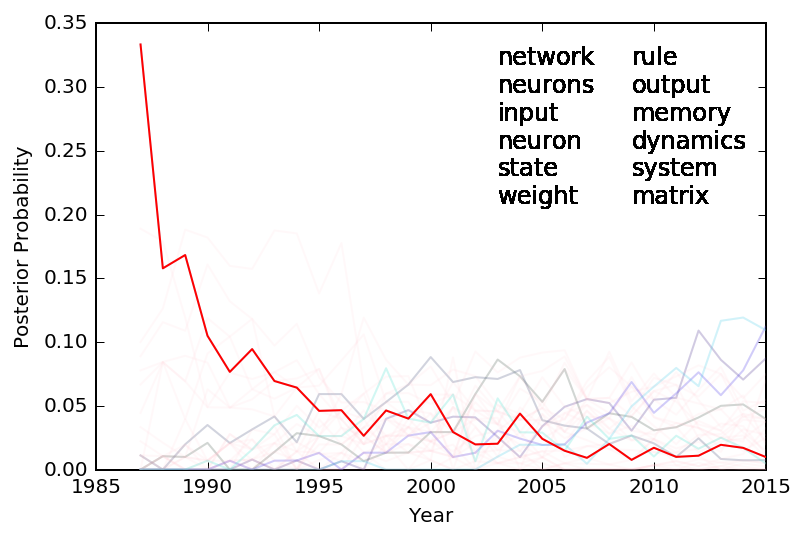

In [52]:
selectedGroup = [19]
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
props = dict(boxstyle='square', facecolor='white', alpha=0)

# Have a look at the colormaps here and decide which one you'd like:
# http://matplotlib.org/1.2.1/examples/pylab_examples/show_colormaps.html

num_plots = 25
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])

textstr1 = ''
for j in range(6):
    textstr1 += listNlargest[j]
    if j < 5:
        textstr1 += "\n"
        
textstr2 = ''        
for j in range(6, len(listNlargest)):
    textstr2 += listNlargest[j]
    if j < len(listNlargest)-1:
        textstr2 += "\n"

# Plot several different functions...
x = np.arange(1987,2016)
labels = []
for i in range(31):
    y = [groupAveragesOverYears[y][i] for y in range(len(groupAveragesOverYears))]
    #yhat = savitzky_golay(y, 51, 9)
    if i in clusters:
        ax1.plot(x,y, alpha = .2, zorder = 5)
        #ax1.plot(x,y , color = 'green')
    if i in selectedGroup:
        #ax1.plot(x, smooth(y,3), color = 'blue', alpha = .2)
        ax1.plot(x, y, color = "red", alpha = 1, zorder = 31)
    else:
        ax1.plot(x,y,color = "pink", alpha = .1,zorder = 5)
        
    ax1.text(0.6, 0.95, textstr1, transform=ax1.transAxes, fontsize=12,
             multialignment = 'left' , verticalalignment='top', bbox=props)
    ax1.text(0.8, 0.95, textstr2, transform=ax1.transAxes, fontsize=12,
             multialignment = 'left' , verticalalignment='top', bbox=props)
    labels.append(r'$Group %i $'%i )

# I'm basically just demonstrating several different legend options here...
#ax1.legend(labels, ncol=4, loc='upper center', 
           #bbox_to_anchor=[0.5, 1.1], 
           #columnspacing=1.0, labelspacing=0.0,
        #handletextpad=0.0, handlelength=1.5, fancybox=True, shadow=True)
#plt.style.use("ggplot")
plt.xlabel("Year")
plt.ylabel("Posterior Probability")
plt.show()
fig1.savefig('proportionsOverTimeGroup' + str(selectedGroup[0])+ 'Highlighted.eps',format='eps', dpi=1000)

In [23]:
mat = np.array(groupAveragesOverYears).transpose()
prop = []
for i in range(31):
    prop.append(list(mat[i]))

In [24]:
clust = []
for i in range(0,31):
    clust.append([i]*29)

In [25]:
years = list(np.arange(1987,2016))

In [26]:
import random

def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
    return color

In [27]:
col = generate_color()

In [28]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt

In [29]:
x_scale=1
y_scale=1
z_scale=1

scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0

def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)


In [49]:
#fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize = (35, 20))
#ax.get_proj=short_proj

#for i in range(31):
 #   ax.plot(clust[i],years,prop[i] , color=generate_color())
#    ax.set_xlabel('Cluster')
#    ax.set_ylabel('Year')
#    ax.set_zlabel('Posterior Probability')
#    ax.set_zlim([0, 0.3])

#plt.show()
#fig.savefig("AllClustersEvolution.png")

In [31]:
for g in selectedGroups:
    print(groups[0].count(g))

258
76
216
145
183
254
158
2
187
225
162
208
210
171
247
265
177
225
233
224
195
243
165
120
238
151
132
233
114
245
141


In [32]:
#selectedGroups = [u for u in range(20, 30)]

RMQ: number of projected articles must be greater than 10

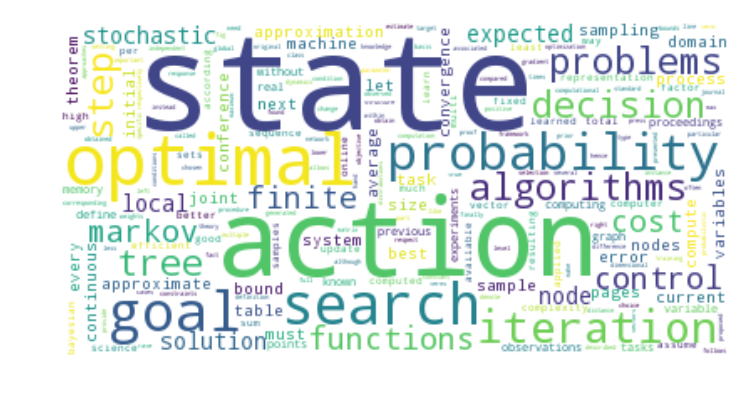

['state', 'action', 'optimal', 'search', 'goal', 'probability']

In [19]:
selectedGroups = [30]   #defines which cluster to be represented
for g in selectedGroups:
    #dicGroup = dict(zip(dictionary, list(P[g])))
    wordcloud = WordCloud( background_color='white')
    wordcloud.generate_from_frequencies(frequencies=dicGroup)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    wordcloud.to_file("WordCloudGroup "+ str(g) + ".eps")
import heapq
heapq.nlargest(6, dicGroup, key=dicGroup.get)

In [18]:
dicGroup

{'according': 0.003393672839719827,
 'accuracy': 0.00071517995074100657,
 'action': 0.03588564683020936,
 'active': 0.00040667681542472505,
 'activity': 9.8162020363739815e-05,
 'algorithms': 0.011400921161324816,
 'allows': 0.0024402603838951796,
 'although': 0.0024400873136935868,
 'applications': 0.001486522475930989,
 'applied': 0.0033516765142791003,
 'approaches': 0.0030290079121361906,
 'approximate': 0.0068997271831660687,
 'approximation': 0.0071383001622363565,
 'associated': 0.0030290837091211356,
 'assume': 0.0035760098066779399,
 'assumption': 0.0014866199567366138,
 'available': 0.0034918244347814718,
 'average': 0.004711922302087143,
 'basis': 0.0027064894601659681,
 'bayesian': 0.0034778177281313081,
 'best': 0.0069835224284344076,
 'better': 0.0037161937078622406,
 'binary': 0.00070110138470406416,
 'bound': 0.0055812747588809466,
 'bounds': 0.0027205106171847393,
 'called': 0.0027065728450122069,
 'cases': 0.0020473855509559472,
 'cells': 0.0014584069971434537,
 'chan

In [48]:
import heapq
heapq.nlargest(6, dicGroup, key=dicGroup.get)

['state', 'action', 'states', 'optimal', 'search', 'goal']

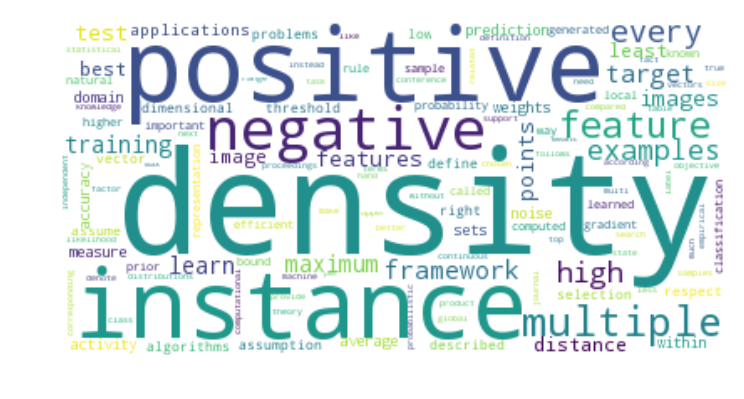

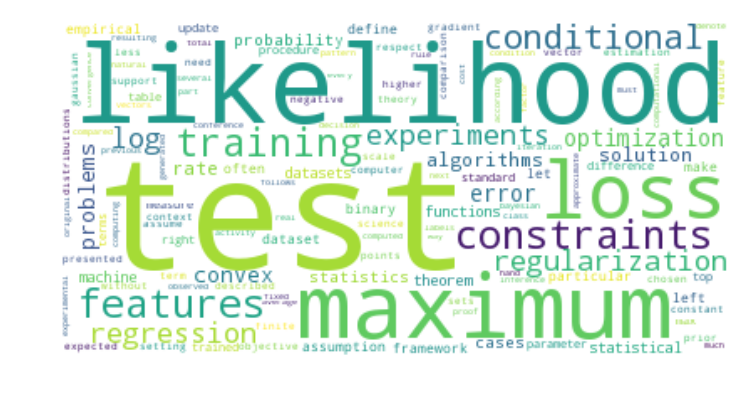

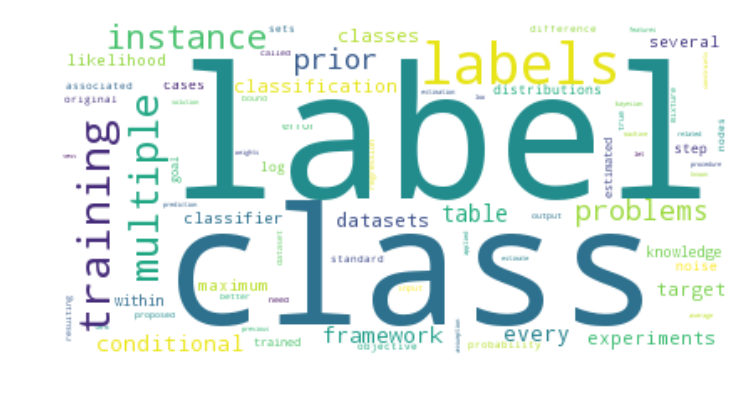

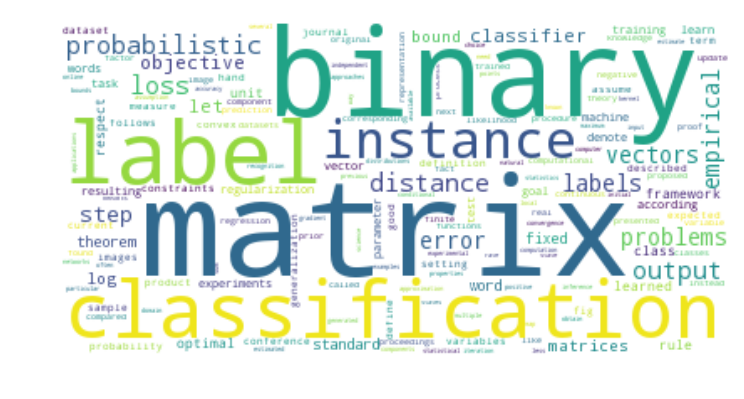

In [38]:
cluster = 3
closestArticles = nlargest(4, range(len(Rpost[:,cluster])), Rpost[:,cluster].take)
for article in closestArticles:
    wordRepartitionArticle = list(data.ix[article])
    nbWords = float(sum(wordRepartitionArticle))
    proportionsArticle = [u / nbWords for u in wordRepartitionArticle]
    dicGroup = dict(zip(dictionary,  proportionsArticle  ))
    wordcloud = WordCloud( background_color='white')
    wordcloud.generate_from_frequencies(frequencies=dicGroup)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

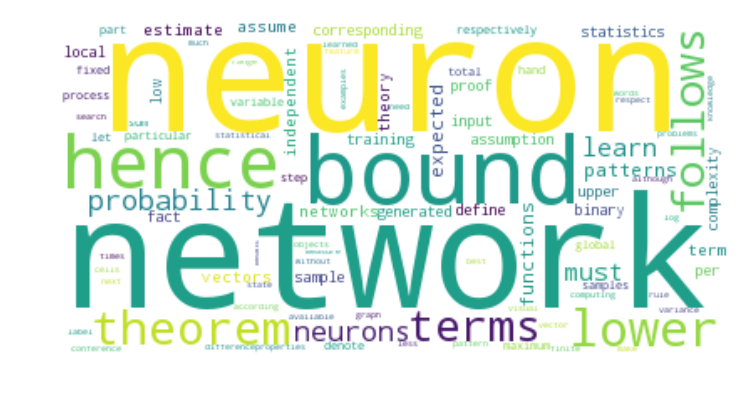

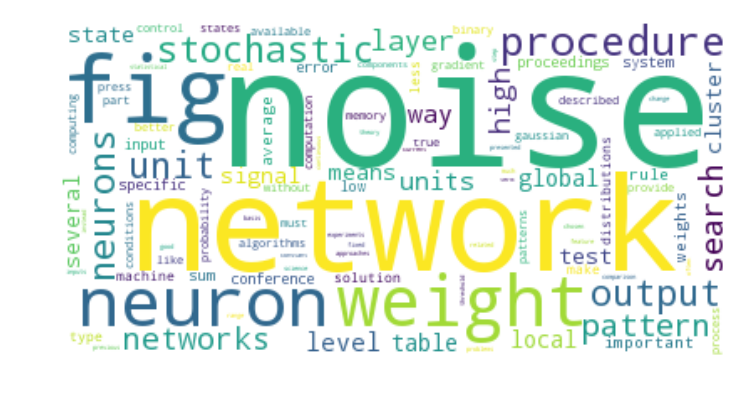

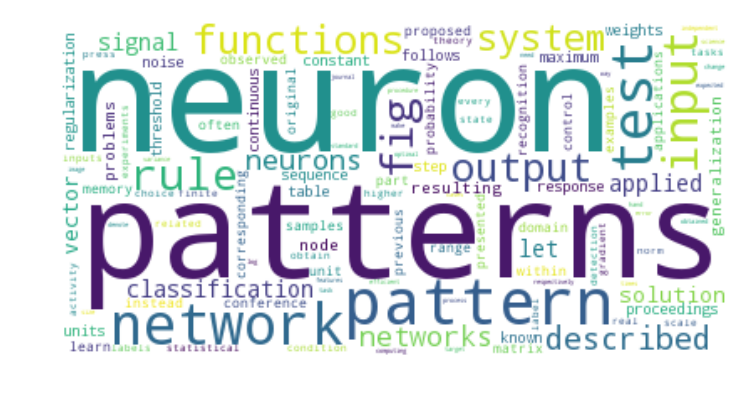

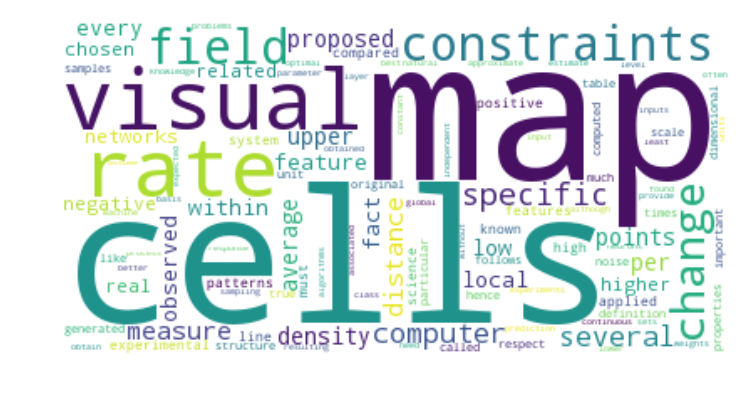

In [23]:
closestArticles = nlargest(4, range(len(Rpost[:,3])), Rpost[:,4].take)
for article in closestArticles:
    wordRepartitionArticle = list(data.ix[article])
    nbWords = float(sum(wordRepartitionArticle))
    proportionsArticle = [u / nbWords for u in wordRepartitionArticle]
    dicGroup = dict(zip(dictionary,  proportionsArticle  ))
    wordcloud = WordCloud( background_color='white')
    wordcloud.generate_from_frequencies(frequencies=dicGroup)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

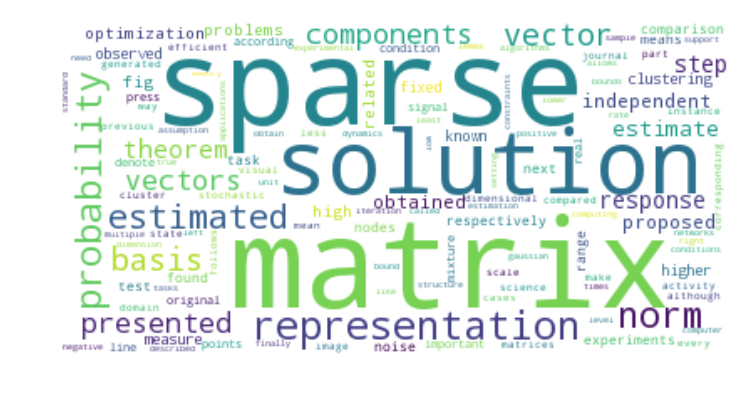

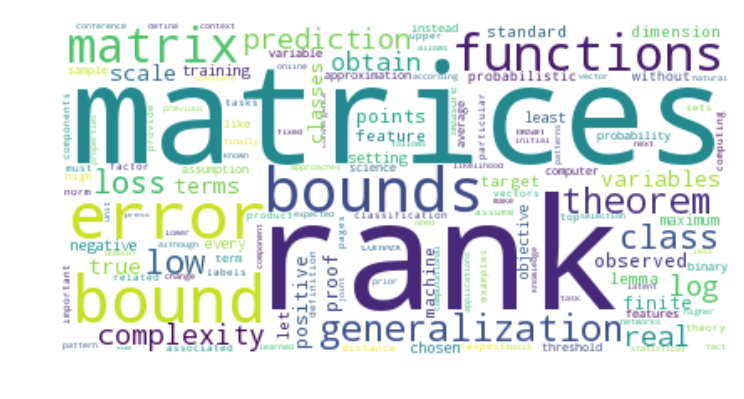

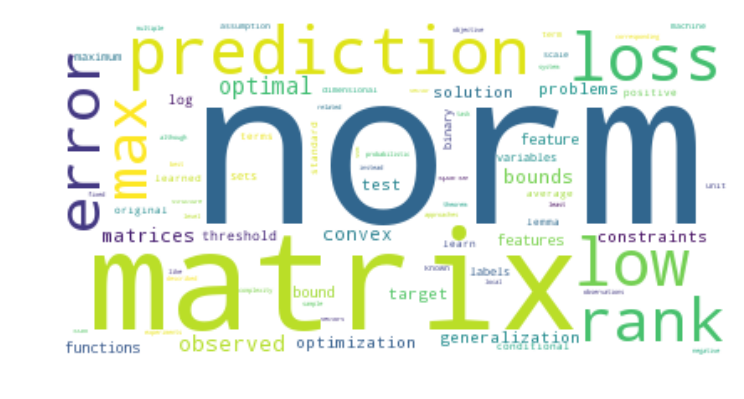

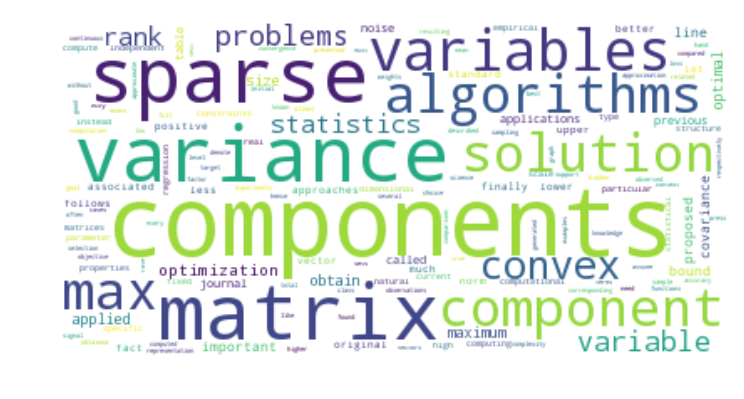

In [196]:
closestArticles = nlargest(4, range(len(Rpost[:,0])), Rpost[:,24].take)
for article in closestArticles:
    wordRepartitionArticle = list(data.ix[article])
    nbWords = float(sum(wordRepartitionArticle))
    proportionsArticle = [u / nbWords for u in wordRepartitionArticle]
    dicGroup = dict(zip(dictionary,  proportionsArticle  ))
    wordcloud = WordCloud( background_color='white')
    wordcloud.generate_from_frequencies(frequencies=dicGroup)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()